In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv(r"C:\Users\Urvi\Downloads\archive (8)\Social_Network_Ads.csv")

In [89]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [90]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [91]:
df.drop(['User ID', 'Gender'], axis=1, inplace = True)


In [92]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [93]:
x =df.iloc[:,:2]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [94]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [97]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [98]:
model = LogisticRegression()
model.fit(x_test_scaled,y_test)

LogisticRegression()

In [99]:
y_pred = model.predict(x_test_scaled)

In [100]:
cm = confusion_matrix(y_test, y_pred)

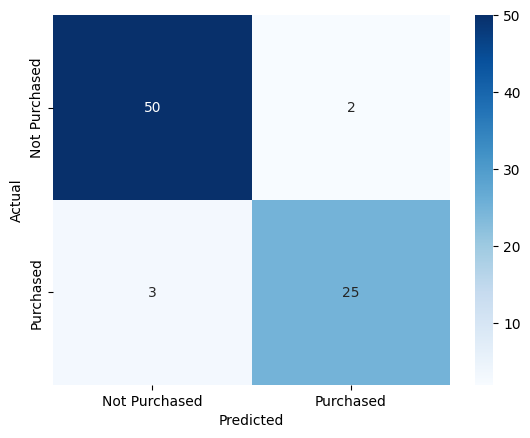

In [101]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues', xticklabels=['Not Purchased','Purchased'], yticklabels=['Not Purchased','Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
TP = cm [1,1]
FP =cm [0,1]
TN =cm [0,0]
FN= cm [1,0]

print("True Positive: ",TP)
print("False Positive: ",FP)
print("True Negative: ",TN)
print("False Negative: ",FN)

True Positive:  25
False Positive:  2
True Negative:  50
False Negative:  3


In [103]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)
error_rate = 1 - accuracy
print("Error rate:", error_rate)
precision = precision_score(y_test,y_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_pred)
print("Recall: ",recall)

Accuracy:  0.9375
Error rate: 0.0625
Precision:  0.9259259259259259
Recall:  0.8928571428571429
